In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os 
import env
import nltk
import unicodedata
import re
import acquire
import prepare
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

Spam Data

- Load the spam data set.
- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- Is there any overlap in the bigrams for the spam data and the ham data?
- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [2]:
# set format for plots
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [3]:
def get_spam_data(use_cache=True):
    filename = "spam.csv"
    if os.path.isfile(filename) and use_cache:
        print("Let me get that for you...")
        return pd.read_csv(filename)
    print("Sorry, nothing on file, let me create one for you...")
    data = 'spam_db'
    url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{data}'
    query = '''
            SELECT *
            FROM spam
            '''
    data = pd.read_sql(query, url)
    data.to_csv(filename, index=False)
    return data

In [4]:
spam_df = get_spam_data()

Let me get that for you...


In [5]:
# Load the spam data set
df = pd.read_csv('spam.csv')
# set the index to the id
df.set_index('id', inplace=True)
#print 
print(df.shape)
df.head(20)

(5572, 2)


,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...


In [6]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [7]:
clean(df['text'][0])

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

In [8]:
# use clean function to clean each row of text in the dataframe
df['text'] = df['text'].apply(clean)
df['text'].head(20)

id
0     go until jurong point crazy available only in ...
1                               ok lar joking wif u oni
2     free entry in 2 a wkly comp to win fa cup fina...
3           u dun say so early hor u c already then say
4     nah i dont think he goes to usf he lives aroun...
5     freemsg hey there darling its been 3 weeks now...
6     even my brother is not like to speak with me t...
7     as per your request melle melle oru minnaminun...
8     winner as a valued network customer you have b...
9     had your mobile 11 months or more u r entitled...
10    im gonna be home soon and i dont want to talk ...
11    six chances to win cash from 100 to 20000 poun...
12    urgent you have won a 1 week free membership i...
13    ive been searching for the right words to than...
14                    i have a date on sunday with will
15    xxxmobilemovieclub to use your credit click th...
16                                 oh kim watching here
17    eh u remember how 2 spell his name yes 

In [9]:
df

,label,text
id,,
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will i b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...


In [10]:
# real texts
ham_words = clean(' '.join(df[df.label == 'ham'].text))

#spam messages
spam_words = clean(' '.join(df[df.label == 'spam'].text))

# all messages
all_words = clean(' '.join(df.text))

In [11]:
# Create and explore bigrams for the spam data. Visualize them 
# with a word cloud. How do they compare with the ham bigrams?

# pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
# plt.title('Top 10 most common spam bigrams')

def ngrams_wordcloud (text_list, title_list, n=2):
    for i in  range (0, len(text_list)):
        plt.figure(figsize=(20,16))
        plt.subplot(2,2,1)
        pd.Series(nltk.ngrams(text_list[i].split(), n=n)).value_counts().head(10).plot.barh()
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        plt.subplot(2,2,2)
        img = WordCloud(background_color='white', width=800, height=600).generate(text_list[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        #plt.tight_layout()
        plt.show()

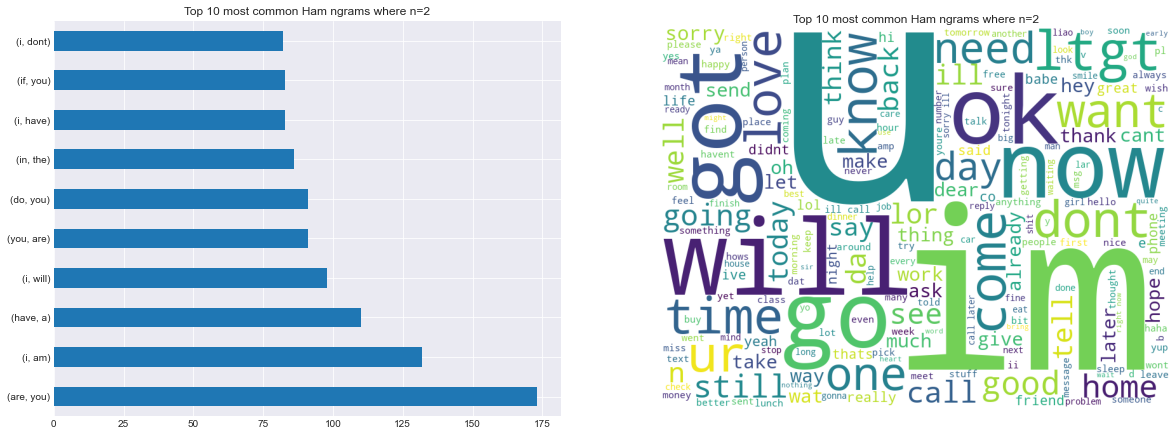

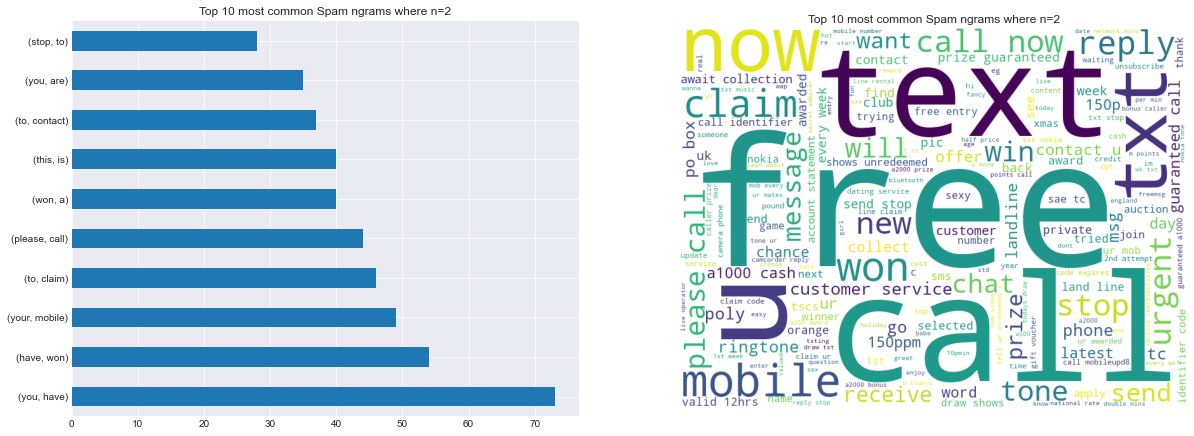

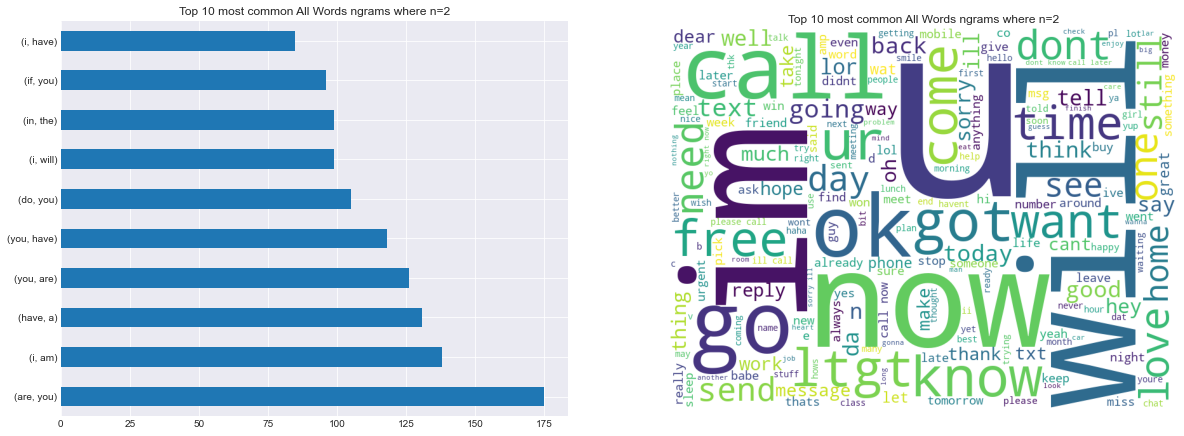

In [12]:
from wordcloud import WordCloud

# img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
# plt.imshow(img)
# plt.axis('off')

text_list= [ham_words, spam_words, all_words]
title_list=['Ham', 'Spam', 'All Words']
ngrams_wordcloud(text_list, title_list)

Is there any overlap in the bigrams for the spam data and the ham data?

yes

In [15]:
def ngrams_wordcloud (text_list, title_list, n=3):
    for i in  range (0, len(text_list)):
        plt.figure(figsize=(20,16))
        plt.subplot(2,2,1)
        pd.Series(nltk.ngrams(text_list[i].split(), n=n)).value_counts().head(10).plot.barh()
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        plt.subplot(2,2,2)
        img = WordCloud(background_color='white', width=800, height=600).generate(text_list[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        #plt.tight_layout()
        plt.show()

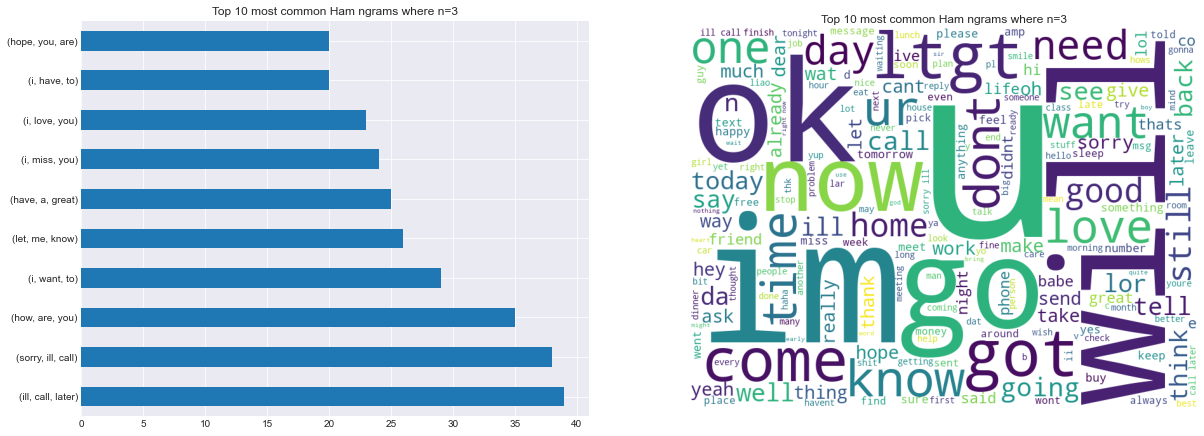

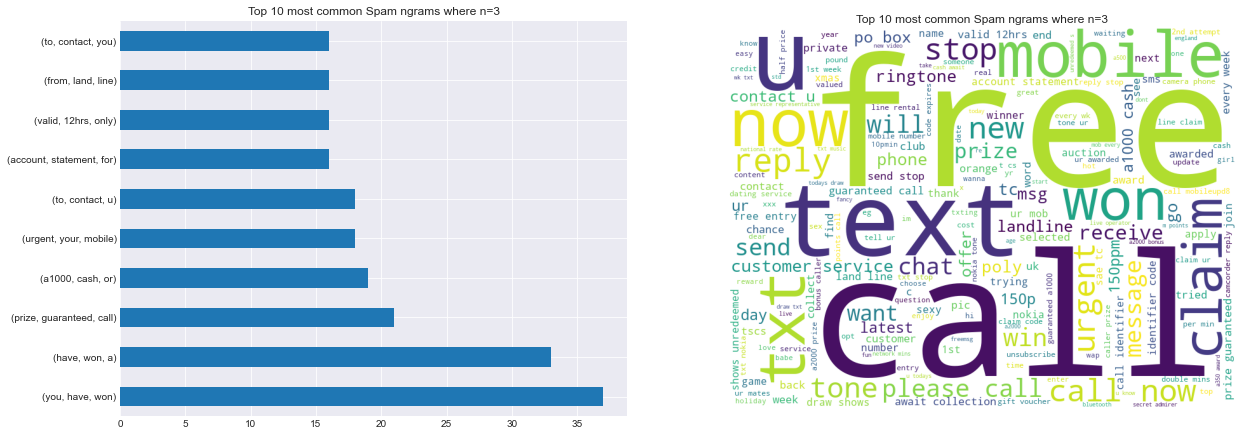

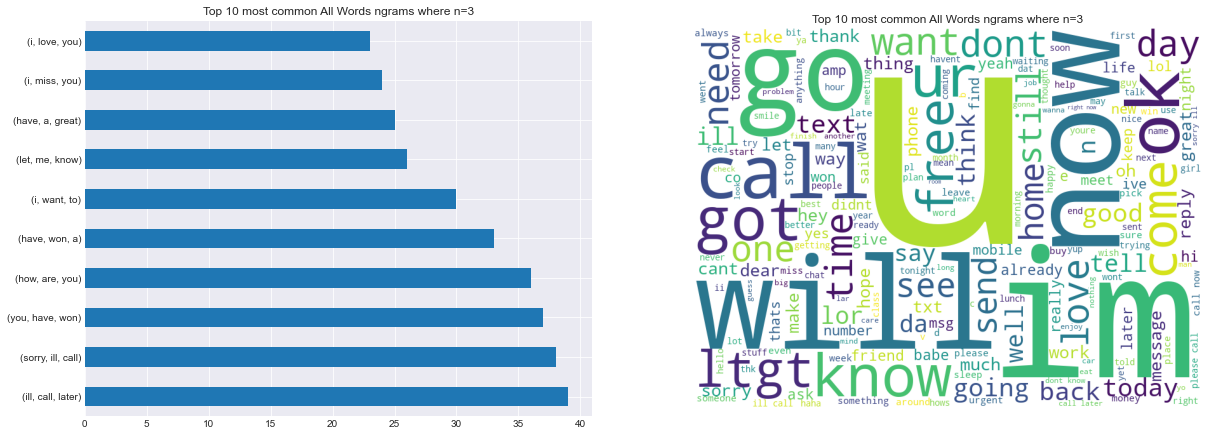

In [16]:
text_list= [ham_words, spam_words, all_words]
title_list=['Ham', 'Spam', 'All Words']
ngrams_wordcloud(text_list, title_list)

2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [28]:
import requests
from bs4 import BeautifulSoup

def codeup_blog_urls():
    
    """ return list of URLs for codeup blogs for exercise """
    
    url1 = 'https://codeup.com/codeup-news/codeup-launches-first-podcast-hire-tech/' 

    url2 ='https://codeup.com/tips-for-prospective-students/why-should-i-become-a-system-administrator/'
    
    url3 ='https://codeup.com/codeup-news/codeup-candidate-for-accreditation/'
    
    url4 ='https://codeup.com/codeup-news/codeup-takes-over-more-of-the-historic-vogue-building/'
    
    url5 ='https://codeup.com/codeup-news/inclusion-at-codeup-during-pride-month-and-always/'
    
    return [url1, url2, url3, url4, url5]

def acquire_codeup_blog(url):
    
    """ returns dict of one codeup blog's title, date, category, and content """
    
    # set agent
    agent = 'codeup ds germain'
    
    # query
    response = requests.get(url, headers={'User-Agent': agent})
    
    # soup
    soup = BeautifulSoup(response.text)
    
    # get title
    title = soup.select('.entry-title')[0].text
    
    # get date
    date = soup.select('.published')[0].text
    
    # get category
    category = soup.find_all('a', {'rel':'category tag'})[0].text
    
    # grab all unformatted paragraphs
    paragraphs = soup.select('.entry-content p')
    # paragraphs = soup.find_all('div', {'class':'et_pb_module et_pb_post_content et_pb_post_content_0_tb_body'})[0]\
    # .find_all('p')
    
    # create list for formatted paragraphs
    paragraph_list = []
    
    # iterate paragraphs
    for paragraph in paragraphs:
        
        # add to list
        paragraph_list.append(paragraph.text)
        
    # destroy href markers
    content = " ".join(paragraph_list).replace('\xa0', ' ')
    
    # create dict
    blog_info_dict = {'title':title, 'date':date, 'category':category, 'content':content}
    
    # return dict
    return blog_info_dict

def get_blogs():
    
    """ queries, returns a dataframe of each codeup blog article's stuff """
    
    list_of_blog_dicts = []
    for url in codeup_blog_urls():
        list_of_blog_dicts.append(acquire_codeup_blog(url))
    return pd.DataFrame(list_of_blog_dicts)

In [29]:
acquire_codeup_blog('https://codeup.com/codeup-news/inclusion-at-codeup-during-pride-month-and-always/')


{'title': 'Inclusion at Codeup During Pride Month (and Always)',
 'date': 'Jun 4, 2021',
 'category': 'Codeup News',
 'content': 'Happy Pride Month! Pride Month is a dedicated time to celebrate and support the LGBTQIA+ community. At Codeup, one of our core values is Cultivating Inclusive Growth, something that takes on many shapes, sizes, forms, and colors. From representation in tech to empowering and supporting all, let’s reflect on how we live out this core value for our LGBTQIA+ community, not just during Pride Month, but always. We’re firm believers that the people making tech should look like the people using it, which is everyone. We’re proud to offer Pride Scholarships year round, which aim to increase, support, and promote representation of the LGBTQIA+ community in tech. However, representation is only one part of cultivating inclusive growth. We want to help create a thriving tech community where everyone feels represented, but also safe and empowered. In a 2019 survey condu

In [30]:
codeup_df = get_blogs()
codeup_df.head()

,title,date,category,content
0,Codeup Launches First Podcast: Hire Tech,"Aug 25, 2021",Codeup News,Any podcast enthusiasts out there? We are plea...
1,Why Should I Become a System Administrator?,"Aug 23, 2021",IT Training,
2,Announcing our Candidacy for Accreditation!,"Jun 30, 2021",Codeup News,Did you know that even though we’re an indepen...
3,Codeup Takes Over More of the Historic Vogue B...,"Jun 21, 2021",Codeup News,Codeup is moving into another floor of our His...
4,Inclusion at Codeup During Pride Month (and Al...,"Jun 4, 2021",Codeup News,Happy Pride Month! Pride Month is a dedicated ...


In [31]:
all_words = clean(' '.join(codeup_df.content))

In [32]:
all_words.split()[:10]

['any',
 'podcast',
 'enthusiasts',
 'out',
 'there',
 'we',
 'are',
 'pleased',
 'to',
 'announce']

In [33]:
pd.Series(all_words.split()).value_counts()

the           56
and           50
to            39
our           38
in            35
              ..
applicants     1
huge           1
could          1
adult          1
then           1
Length: 573, dtype: int64

In [34]:
# remove stopwords
article = prepare.remove_stopwords(all_words)
article

'podcast enthusiasts pleased announce release codeups first podcast hire tech hire tech conversation new developers people hire hosted ceo cofounder jason straughan world entrylevel positions often require 3 years experience jason sets discover like break work modern tech industry hear various perspectives interviews codeup alumni tech leaders hired codeup stories show impact codeup tech world empowering community real life change first episode jason interviews codeup alum ryan smith working software developer software engineer nearly two years missionary colombia dog handler afghanistan ryans life experiences one many ways codeup grads stand employers paired interview preparation trick listen learn episode reveal went job search total confidence would tell hiring managers regarding juniorlevel talent shouldnt get caught applicant knowing primary language give listen spotify also available apple podcasts anchor google podcasts perfect morning commute know even though independent school

In [35]:
#turn all words into a series
#get value count of all words (after stopwords removed)
pd.Series(article.split()).value_counts()

tech            22
codeup          13
us               9
staff            9
students         7
                ..
usually          1
process          1
requirements     1
exceed           1
thrilled         1
Length: 493, dtype: int64

In [36]:
#assign to a variable
word_freq = pd.Series(article.split()).value_counts()
word_freq.head()

tech        22
codeup      13
us           9
staff        9
students     7
dtype: int64

In [37]:
def ngrams_wordcloud (text_list, title_list, n=2):
    for i in  range (0, len(text_list)):
        plt.figure(figsize=(20,16))
        plt.subplot(2,2,1)
        pd.Series(nltk.ngrams(text_list[i].split(), n=n)).value_counts().head(10).plot.barh()
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        plt.subplot(2,2,2)
        img = WordCloud(background_color='white', width=800, height=600).generate(text_list[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        #plt.tight_layout()
        plt.show()

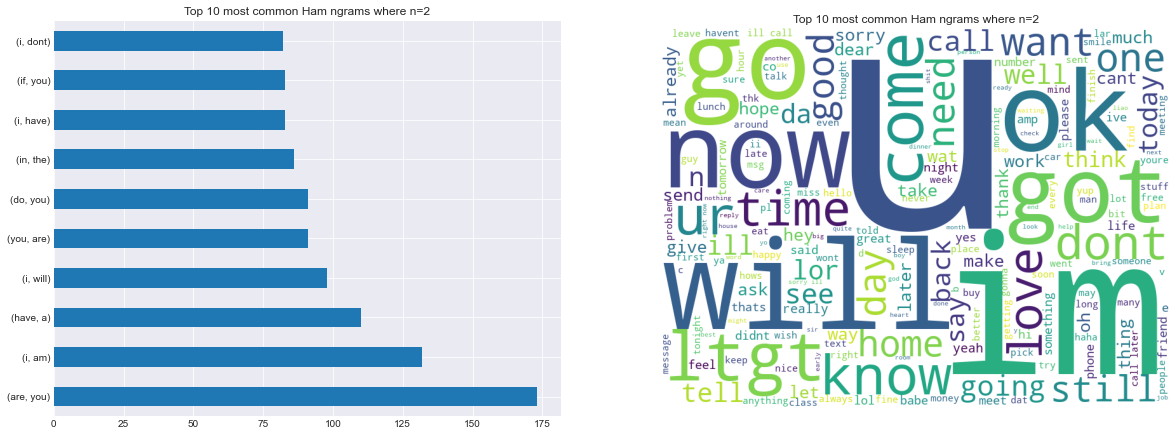

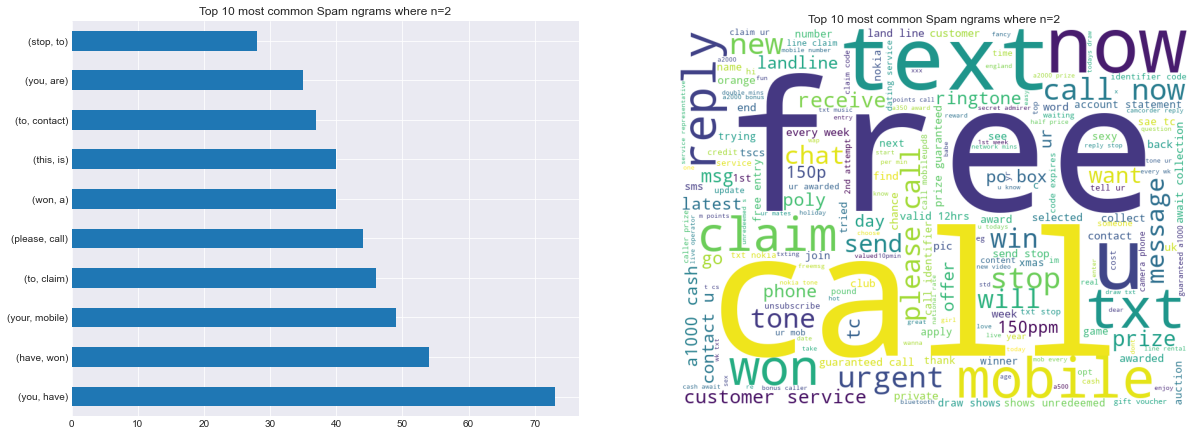

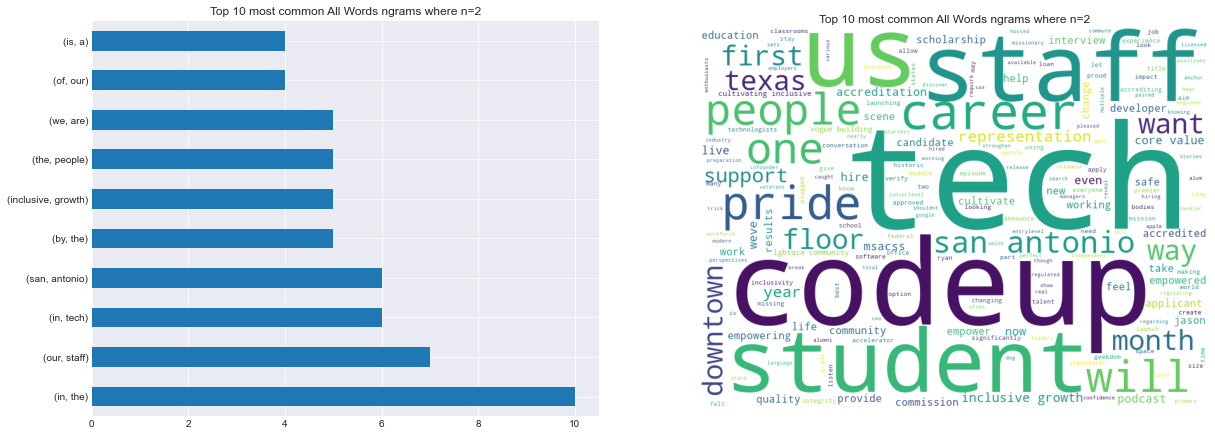

In [38]:
text_list= [ham_words, spam_words, all_words]
title_list=['Ham', 'Spam', 'All Words']
ngrams_wordcloud(text_list, title_list)

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [39]:
categories = ["business", "sports", "technology", "entertainment", "science", "world"]
news_df = acquire.get_all_news_articles(categories)